## Loading Dependencies and Data

In [1]:
#Dependencies
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_breast_cancer #Loading the full DataSet From Sklearn Library

# Breast cancer dataset
cancer = load_breast_cancer()
(X_canc, y_canc) = load_breast_cancer(return_X_y = True)

## Helper Functions

In [2]:
# A Function to Plot labelled Scatter Plot
def plot_labelled_scatter(X, y, class_labels,s):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure(figsize=s)

    plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.4, edgecolor='black', lw = 1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)

    plt.grid(which='both',color='lightslategrey',alpha=0.3)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h,fontsize=15,frameon=False)

# Dimensionality Reduction

An Important family of unsupervised learning methods that fall into the transformation category are known as dimensionality reduction algorithms. As the name suggests, this kind of transform takes your original dataset that might contain say, 200 features and finds an approximate version of dataset that uses, say, only 10 dimensions. One very common need for dimensionality reduction arises when first exploring a dataset, to understand how the samples may be grouped or related to each other by visualizing it using a two-dimensional scatterplot as shown.
<br />

![Dimensionality Reduction](https://miro.medium.com/max/1024/1*vfLvJF8wHaQjDaWv6Mab2w.png)

# Types of Simple Dimensionality Reduction Algorithms/Methods

1. Principle Component Analysis (PCA)
2. Multi-dimensional Scaling (MDS)
3. T-distributed Stochastic Neighbor Embedding (t-SNE)

# 1. Principle Component Analysis (PCA) :

One very important form of dimensionality reduction is called principal component analysis, or PCA. Intuitively, what PCA does is take your cloud of original data points and finds a rotation of it. So the dimensions are statistically uncorrelated. PCA then typically drops all but the most informative initial dimensions that capture most of the variation in the original dataset.

### Mathematically : (For My Fellow Nerds Out There, I Hear You)

The principal components of a collection of points in a real p-space are a sequence of direction vectors where the vector is the direction of a line that best fits the data while being orthogonal to the first vectors.

### How it Works :

![PCA WORKS](https://intoli.com/blog/pca-and-svd/img/basic-pca.png)

Here, if we have two original features $( X1$ & $X2 )$ that are highly correlated represented by this cloud of points, PCA will rotate the data so the direction $( v1 )$ of highest variance - called the first principal component $( PC1 )$, which is along the long direction of the cloud, becomes the first dimension. It will then find the direction $( v2 )$ at right angles that maximally captures the remaining variance. This is the second principle component $( PC2 )$. In two dimensions, there's only one possible such direction at right angles of the first principal component, but for higher dimensions, there would be infinitely many. With more than two dimensions, the process of finding successive principal components at right angles to the previous ones would continue until the desired number of principal components is reached.

## Using PCA to find the first two Principal Components of the Breast Cancer Dataset :

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
#This can be done by using StandardScaler of sklearn Library
canc_norm = StandardScaler().fit(X_canc).transform(X_canc)

pca = PCA(n_components = 2).fit(canc_norm) #Fitting PCA with 2 Components

canc_pca = pca.transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before PCA : {}\n\nNumber of Features in Breast Cancer DataSet After PCA : {}'
      .format(X_canc.shape[1],canc_pca.shape[1]))

Number of Features in Breat Cancer DataSet Before PCA : 30

Number of Features in Breast Cancer DataSet After PCA : 2


## Plotting the PCA-Transformed Version of the Breast Cancer Dataset :

As, You can see the no. of Features of the DataSet are reduced to 2 and Yes, some of the information is lost while using PCA but it comes with the added benefit of better understanding of relation Between Features and better Visualization Capabilities as there are only 2 features

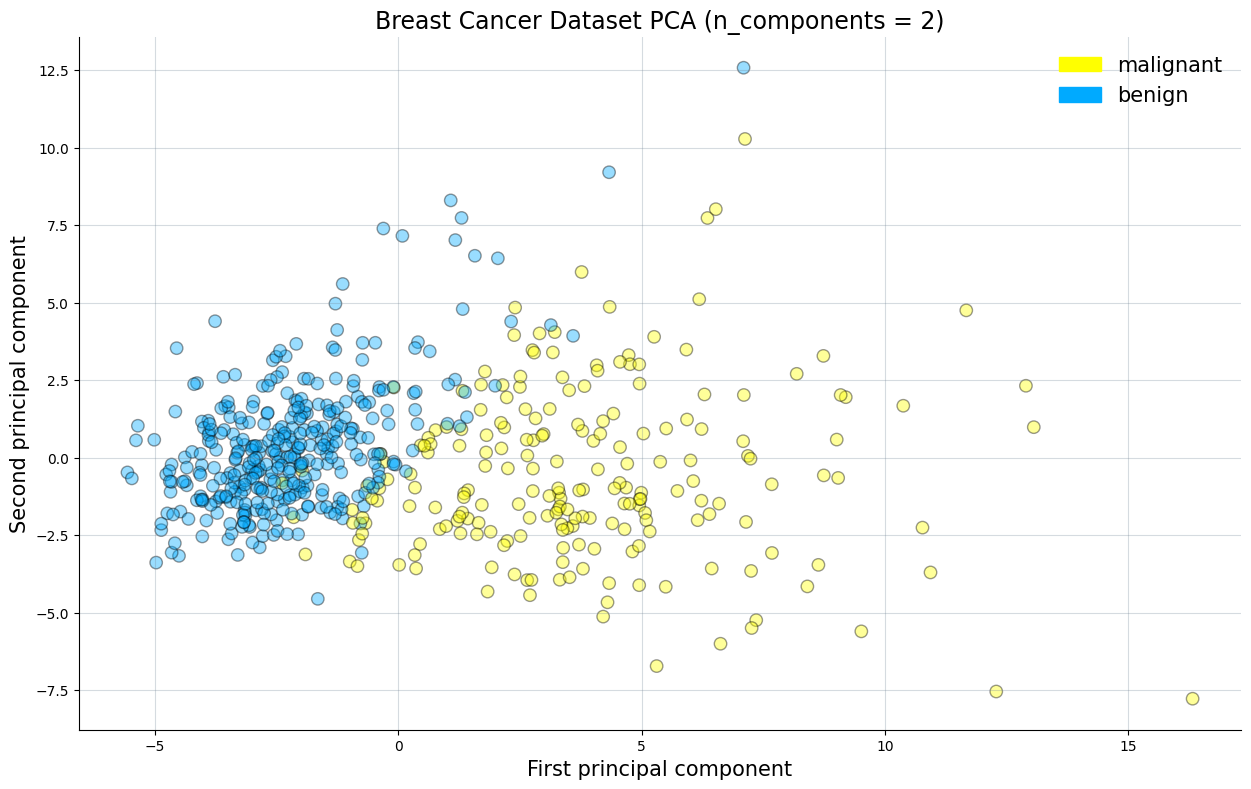

In [4]:
plot_labelled_scatter(canc_pca, y_canc, ['malignant', 'benign'],(15,9)) #Using the Helper Function

#Labelling
plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second principal component',fontsize=15)
plt.title('Breast Cancer Dataset PCA (n_components = 2)',fontsize=17);

Now, We can see that the two target classes are easily seperable even by a simple logistic regression. Hence, In this case the PCA gave Results which were not only easy to Interpret but also easy to Classify

## Using PCA to get feature Co-Relation Between the Initial 30 Features

PCA Offers a attribute '.components_' that stores Co-relation Between all the high and low Variance Pair of Feature that were generated During Fitting of PCA object and these Co-Relation Values can utilized and Visualized By Using a Heatmap

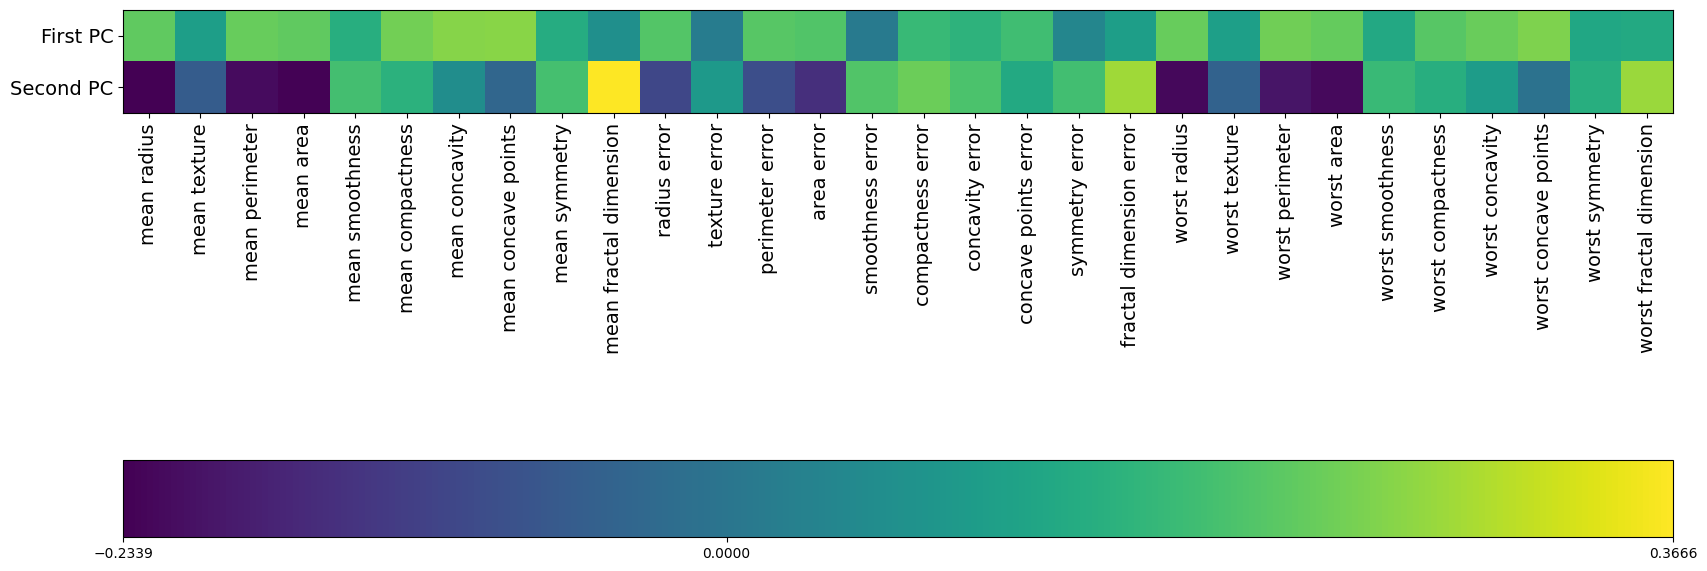

In [5]:
fig = plt.figure(figsize=(20,9))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'viridis')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(len(feature_names)));
plt.gca().set_yticks(np.arange(2));
plt.gca().set_xticklabels(feature_names, rotation=90, fontsize=14);
plt.gca().set_yticklabels(['First PC', 'Second PC'], fontsize=14);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()], pad=0.5);

We can see that the first principle component is all positive, showing a general correlation between all 30 features. In other words, they tend to vary up and down together. The second principle component has a mixture of positive and negative signs; but in particular, we can see a cluster of negatively signed features that co-vary together and in the opposite direction of the remaining features. Looking at the names, it makes sense the subset wold co-vary together. We see the pair mean texture and worst texture and the pair mean radius and worst radius varying together and so on.

## Remarks on PCA

PCA gives a good initial tool for exploring a dataset. As it fast and works on almost all type of DataSets, but it may not be able to find more subtle groupings that produce better visualizations for more complex datasets.

# 2. Multi-Dimensional Scaling : (MDS)

There is a family of unsupervised algorithms called Manifold Learning Algorithms that are very good at finding low dimensional structure in high dimensional data and are very useful for visualizations. One classic example of a low dimensional subset in a high dimensional space is this data set, The 'Swiss Role DataSet' as shown, in three dimensions. Hhere the points all lie on a two-dimensional sheet with an interesting shape. This lower dimensional sheet within a higher dimensional space is called the manifold. PCA is not sophisticated enough to find this interesting structure. One widely used manifold learning method is called multi-dimensional scaling, or MDS.

![Swiss Role](https://lijiancheng0614.github.io/scikit-learn/_images/plot_ward_structured_vs_unstructured_002.png)

## Types of MDS :

There are many flavors of MDS, but they all have the same general goal; to visualize a high dimensional dataset and project it onto a lower dimensional space - in most cases, a two-dimensional page - in a way that preserves information about how the points in the original data space are close to each other. In this way, you can find and visualize clustering behavior in your high dimensional data.

## Using MDS on the Breast Cancer Dataset :

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2,random_state = 2)

canc_mds = mds.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before MDS : {}\n\nNumber of Features in Breast Cancer DataSet After MDS : {}'
      .format(X_canc.shape[1],canc_mds.shape[1]))

plot_labelled_scatter(canc_mds, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First MDS dimension',fontsize=15)
plt.ylabel('Second MDS dimension',fontsize=15)
plt.title('Breast Cancer Dataset MDS (n_components = 2)',fontsize=17);

## Remarks on MDS :

You can see, That MDS did a similar job to PCA but there is a diffrence between MDS and PCA distribution and that is because both algorithms works on different principles and uses different mathematical models. You can read about the Maths behind the algorithms in the skikit learn documentation along with various other parameters you can play with. but that section is out of scope of this Notebook

# 3. T-distributed Stochastic Neighbor Embedding (t-SNE)

An especially powerful manifold learning algorithm for visualizing your data is called t-SNE. t-SNE finds a two-dimensional representation of your data, such that the distances between points in the 2D scatterplot match as closely as possible the distances between the same points in the original high dimensional dataset. In particular, t-SNE gives much more weight to preserving information about distances between points that are neighbors.

![T SNE](https://miro.medium.com/max/685/1*njEd7PiqBW-zW38E23Ho9w.png)

## Using T-SNE on the Breast Cancer Dataset :

The code is very similar to applying MDS and essentially just replaces MDS with t-SNE.

Number of Features in Breat Cancer DataSet Before T-SNE : 30

Number of Features in Breast Cancer DataSet After T-SNE : 2


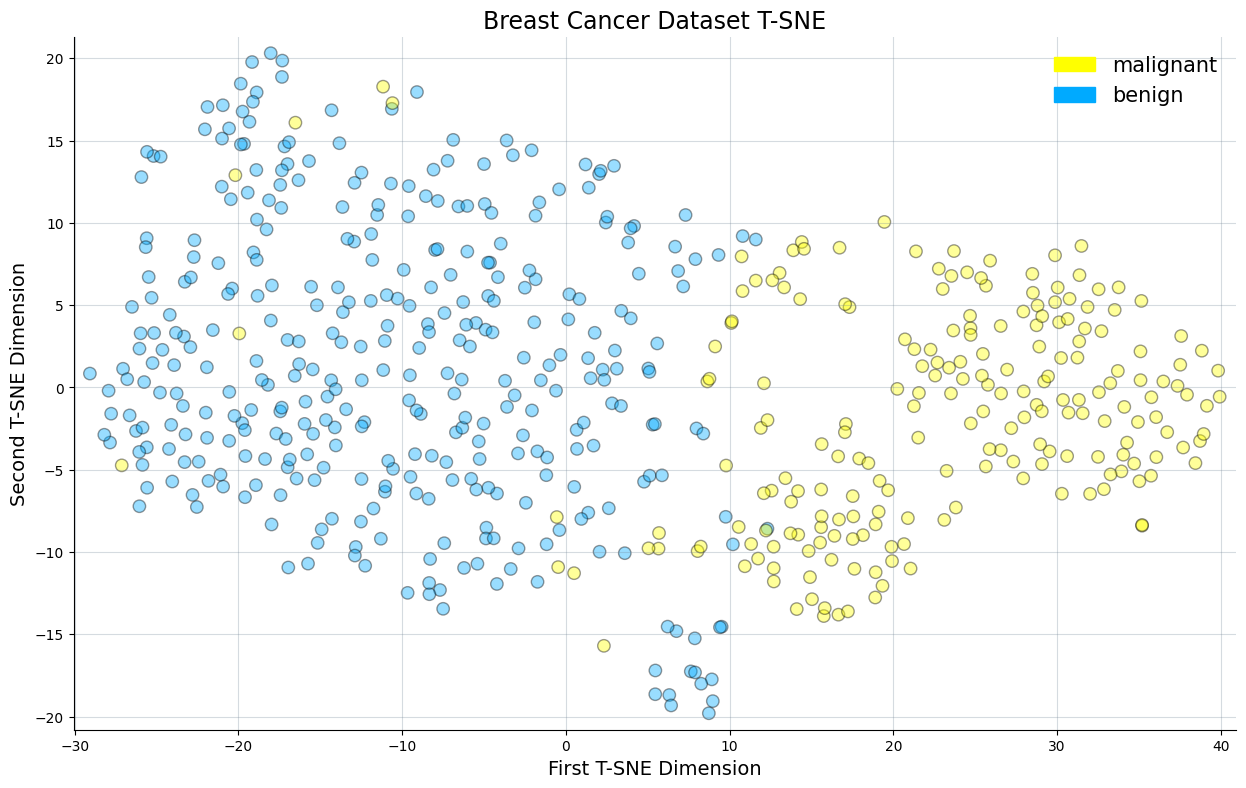

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)

canc_tsne = tsne.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before T-SNE : {}\n\nNumber of Features in Breast Cancer DataSet After T-SNE : {}'
      .format(X_canc.shape[1],canc_tsne.shape[1]))

plot_labelled_scatter(canc_tsne, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First T-SNE Dimension',fontsize=14)
plt.ylabel('Second T-SNE Dimension',fontsize=14)
plt.title('Breast Cancer Dataset T-SNE',fontsize=17);

## Remarks on T-SNE :

The interesting thing here is that T-SNE also does a rather good job of finding structure in this Breast Cancer Dataset, which reminds us that we should try at least a few different approaches when visualizing data using manifold learning to see which works best for a particular dataset. T-SNE tends to work better on datasets that have more well-defined local structure; in other words, more clearly defined patterns of neighbors.

# Conclusion :

This was a breif Introduction to Dimensional Reduction, This is a very vast topic and we have only scratched the surface in this notebook. I am hoping that this notebook would be helpful to you. And remeber reading the documentation is the best way to learn about new methods and parameters to play with.